This notebook contains code for volume analysis, hashtag frequency, TF-IDF of bigrams, and topic modeling.

In [22]:
import os
import sys
sys.path.insert(0, '..')
import utils
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
sns.set_palette("deep")
# Set the figure size and resolution
fig = plt.figure(figsize=(10, 8), dpi=300)
sns.set(font_scale=1.2)
import analyze

<Figure size 3000x2400 with 0 Axes>

In [3]:
# Get the current working directory path
cwd = os.getcwd()

# Get the path to the data directory
data_path = os.path.dirname(os.path.abspath(cwd)) + "/data"
print(data_path)

# read csv
df_processed = pd.read_csv(data_path + "/sentiment.csv")

df_processed.head()

/Users/jiayan/Downloads/codes_macs_2022-2023/macs30200/replication-materials-jiayanli/data


,Period,Username,Date,URL,Content,TweetID,MentionedUsers,Longitude,Latitude,CountryCode,Place,UserID,FollowersCount,UserDescription,UserURL,processed_tweet,hashtags,sentiment_score,sentiment_label,Month
0,0,tewillmott,2019-08-14 23:59:42+00:00,https://twitter.com/tewillmott/status/1161789524902440960,Be your own motivation. Sweat today smile tomorrow \n.\n.\n.\n#health #fitness #fit #fitmom #fitnessmodel #fitnessaddict #fitspo #workout #bodybuilding #cardio #gym #train #training #photooftheday #health #healthy… https://t.co/R6gFBTUXdT,1.161790e+18,NaN,NaN,NaN,NaN,NaN,2378977625,239,"Make up artist for film and television. Also do weddings, Prom's make up and any special occasion make up",https://twitter.com/tewillmott,be motivation sweat today smile tomorrow,"['#health', '#fitness', '#fit', '#fitmom', '#fitnessmodel', '#fitnessaddict', '#fitspo', '#workout', '#bodybuilding', '#cardio', '#gym', '#train', '#training', '#photooftheday', '#health', '#healthy']",0.5994,positive,8
1,0,tewillmott,2019-08-14 23:50:39+00:00,https://twitter.com/tewillmott/status/1161787246460096512,Time to kill some FAT 🥵🥵.\n.\n.\n.\n#health #fitness #fit #fitnessmodel #fitnessaddict #fitspo #workout #fitmom #bodybuilding #cardio #gym #train #training #photooftheday #health #healthy #instahealth #healthychoices… https://t.co/eEcKSMXJcr,1.161787e+18,NaN,NaN,NaN,NaN,NaN,2378977625,239,"Make up artist for film and television. Also do weddings, Prom's make up and any special occasion make up",https://twitter.com/tewillmott,time kill fat,"['#health', '#fitness', '#fit', '#fitnessmodel', '#fitnessaddict', '#fitspo', '#workout', '#fitmom', '#bodybuilding', '#cardio', '#gym', '#train', '#training', '#photooftheday', '#health', '#healthy', '#instahealth', '#healthychoices']",-0.6908,negative,8
2,0,tewillmott,2019-08-14 23:45:06+00:00,https://twitter.com/tewillmott/status/1161785852357308416,Challenge yourself every day.\n..\n.\n.\n#health #fitness #fit #fitmom #fitnessmodel #fitnessaddict #fitspo #workout #bodybuilding #cardio #gym #train #training #photooftheday #health #healthy #instahealth… https://t.co/HIJ9VmUohJ,1.161786e+18,NaN,NaN,NaN,NaN,NaN,2378977625,239,"Make up artist for film and television. Also do weddings, Prom's make up and any special occasion make up",https://twitter.com/tewillmott,challenge every day,"['#health', '#fitness', '#fit', '#fitmom', '#fitnessmodel', '#fitnessaddict', '#fitspo', '#workout', '#bodybuilding', '#cardio', '#gym', '#train', '#training', '#photooftheday', '#health', '#healthy', '#instahealth']",0.0772,positive,8
3,0,tewillmott,2019-08-14 23:40:11+00:00,https://twitter.com/tewillmott/status/1161784615822155777,Excuses don’t burn calories.\n..\n.\n.\n#health #fitness #fit #fitmom fitnessmodel #fitnessaddict #fitspo #workout #bodybuilding #cardio #gym #train #training #photooftheday #health #healthy #instahealth #healthychoices… https://t.co/ZcSW9cTZml,1.161785e+18,NaN,NaN,NaN,NaN,NaN,2378977625,239,"Make up artist for film and television. Also do weddings, Prom's make up and any special occasion make up",https://twitter.com/tewillmott,excuses dont burn calories fitnessmodel,"['#health', '#fitness', '#fit', '#fitmom', '#fitnessaddict', '#fitspo', '#workout', '#bodybuilding', '#cardio', '#gym', '#train', '#training', '#photooftheday', '#health', '#healthy', '#instahealth', '#healthychoices']",0.0000,neutral,8
4,0,tewillmott,2019-08-14 23:36:21+00:00,https://twitter.com/tewillmott/status/1161783648443482112,Let’s get the legs right.\n.\n.\n#health #fitness #fit #fitmom fitnessmodel #fitnessaddict #fitspo #workout #bodybuilding #cardio #gym #train #training #photooftheday #health #healthy #instahealth #healthychoices… https://t.co/KgZT0f8J7V,1.161784e+18,NaN,NaN,NaN,NaN,NaN,2378977625,239,"Make up artist for film and television. Also do weddings, Prom's make up and any special occasion make up",https://twitter.com/tewillmott,lets get legs right fitnessmodel,"['#health', '#fitness', '#fit', '#fitmom', '#fitnessaddict', '#fitspo'

In [4]:
df_processed.dtypes

Period               int64
Username            object
Date                object
URL                 object
Content             object
TweetID            float64
MentionedUsers      object
Longitude          float64
Latitude           float64
CountryCode         object
Place               object
UserID               int64
FollowersCount       int64
UserDescription     object
UserURL             object
processed_tweet     object
hashtags            object
sentiment_score    float64
sentiment_label     object
Month                int64
dtype: object

In [5]:
df_processed.columns

Index(['Period', 'Username', 'Date', 'URL', 'Content', 'TweetID',
       'MentionedUsers', 'Longitude', 'Latitude', 'CountryCode', 'Place',
       'UserID', 'FollowersCount', 'UserDescription', 'UserURL',
       'processed_tweet', 'hashtags', 'sentiment_score', 'sentiment_label',
       'Month'],
      dtype='object')

In [6]:
df_pre = df_processed[df_processed['Period'] == 0].reset_index(drop=True)
df_early = df_processed[df_processed['Period'] == 1].reset_index(drop=True)
df_late = df_processed[df_processed['Period'] == 2].reset_index(drop=True)

## Volume Analysis

In [23]:
# Get the number of rows in each dataframe
pre_len = len(df_pre)
early_len = len(df_early)
late_len = len(df_late)

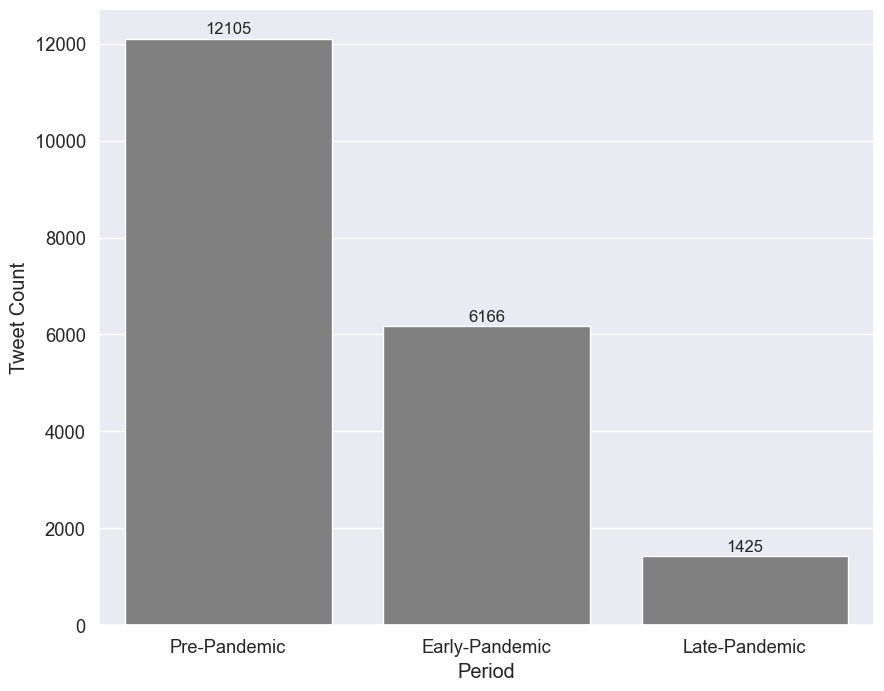

In [64]:
# Create a bar plot of the row counts
labels = ['Pre-Pandemic', 'Early-Pandemic', 'Late-Pandemic']
values = [pre_len, early_len, late_len]

# Plot the bar chart
ax = sns.barplot(x=labels, y=values, color='gray')

# Add labels and title
plt.ylabel('Tweet Count')
plt.xticks(label=['Pre-pandemic, Early-pandemic, Late-pandemic'])
plt.xlabel('Period')

# Add text labels to the bars
for i, value in enumerate(values):
    ax.text(i, value + 100, str(value), ha='center', fontsize=12)

# Set the font size
plt.rcParams['font.size'] = 14
plt.savefig('visualization/volume_by_period.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## Hashtag Analysis

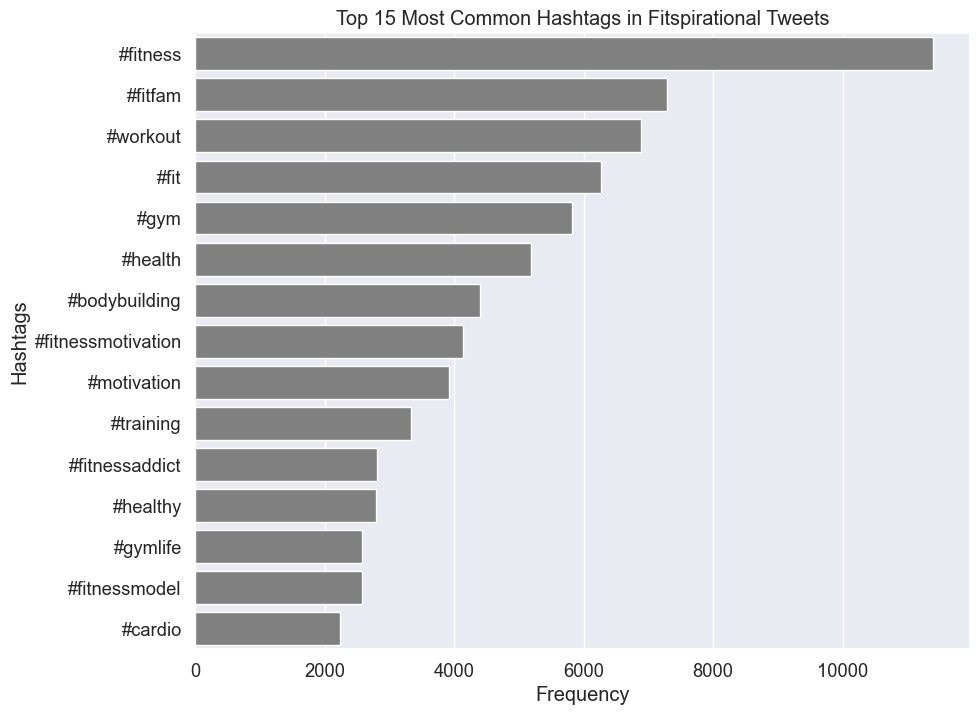

In [52]:
# for all tweets
analyze.topn_hashtags(df_processed['hashtags'], 15, 'all')

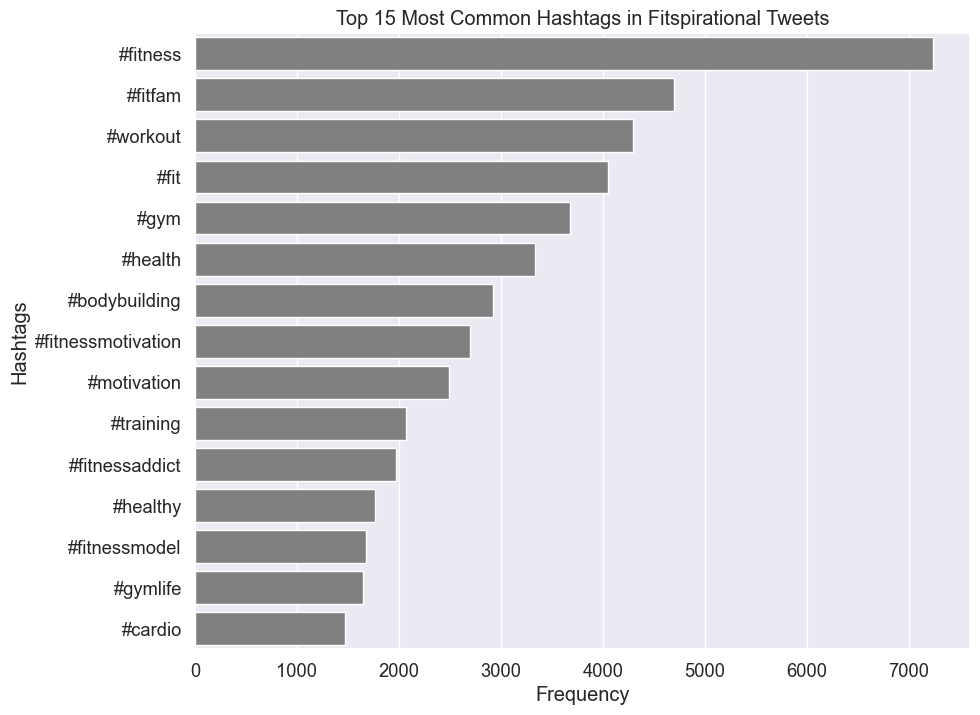

In [53]:
# for pre-pandemic tweets
analyze.topn_hashtags(df_pre['hashtags'], 15, 'pre')

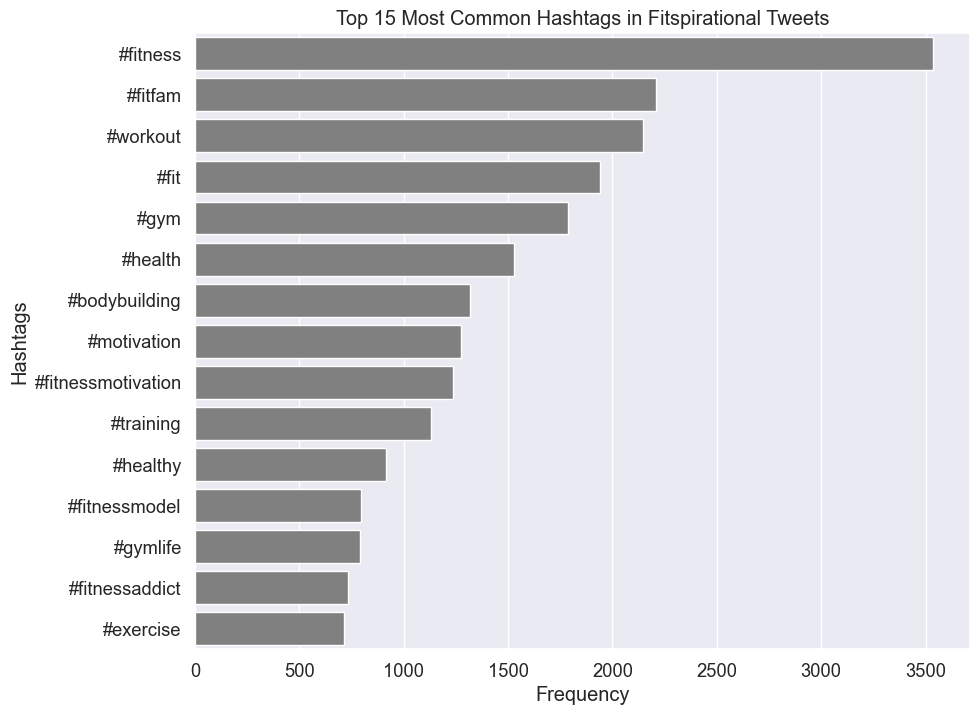

In [54]:
# for early-pandemic tweets
analyze.topn_hashtags(df_early['hashtags'], 15, 'early')

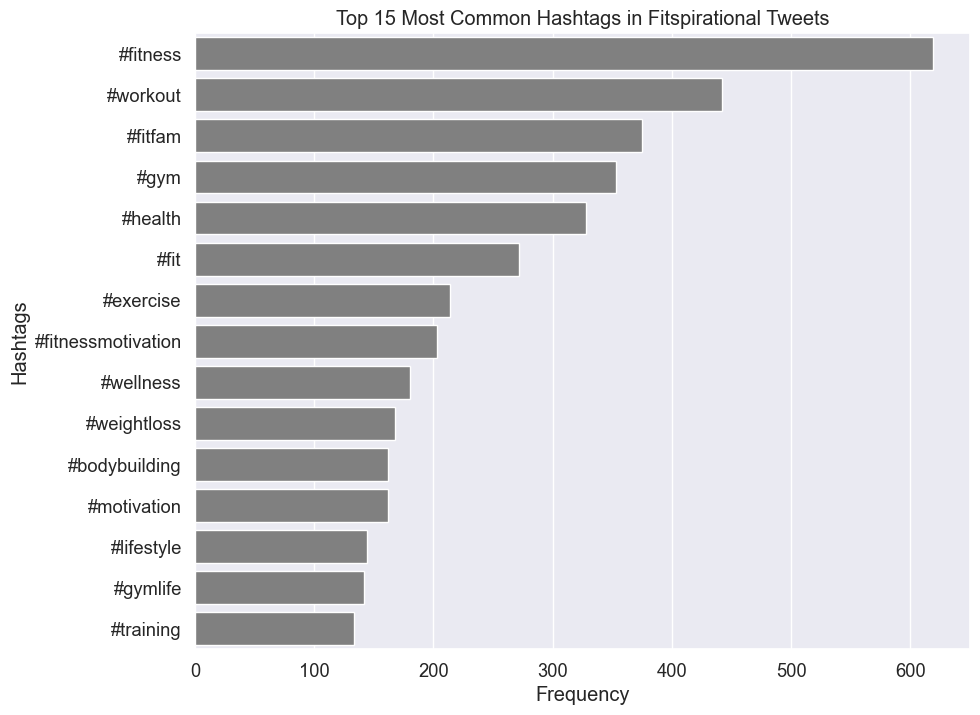

In [55]:
# for late-pandemic tweets
analyze.topn_hashtags(df_late['hashtags'], 15, 'late')

The top 6 most common hashtags remain constant bewteen periods. The rank of bodybuilding is dropping while weightloss starts to appear only in late-pandemic period.

## TF-IDF Analysis

/Users/jiayan/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


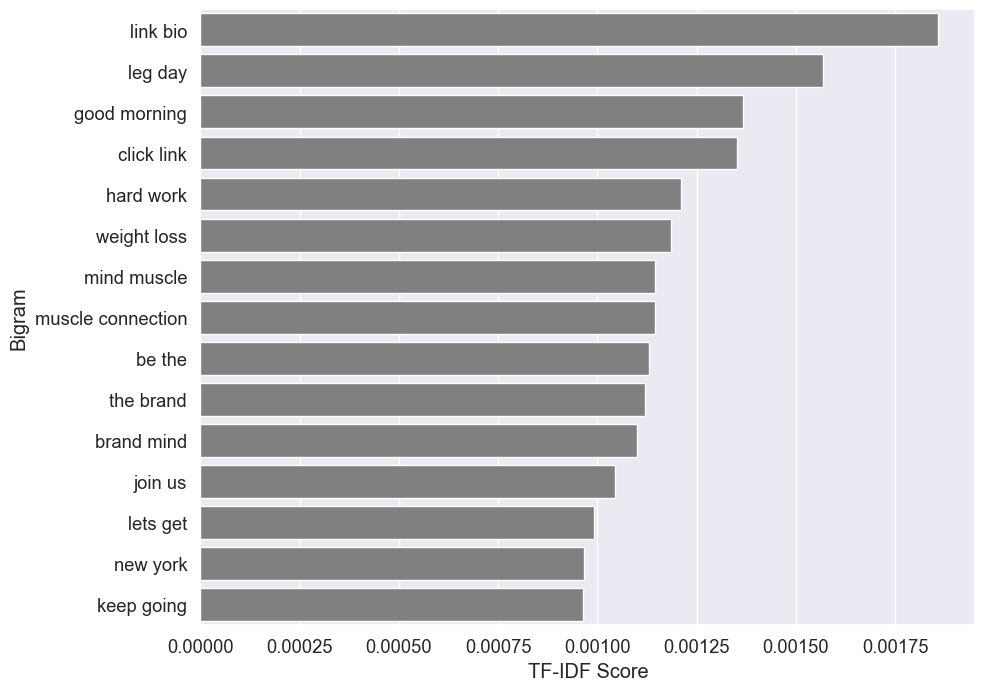

In [57]:
# all periods
analyze.bigram_tfidf(df_processed['processed_tweet'], 15, 'all')

/Users/jiayan/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


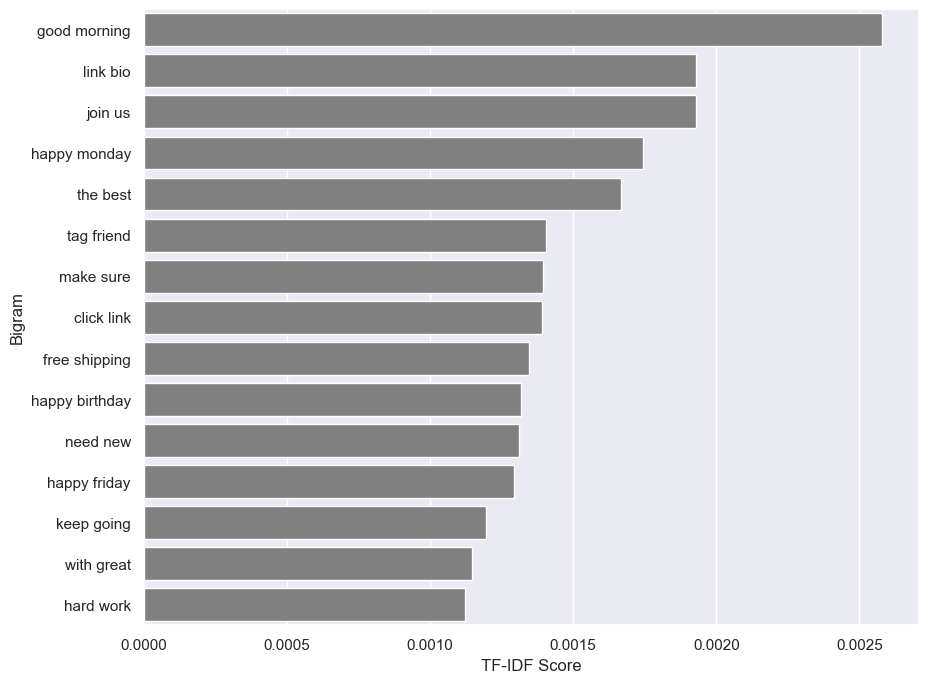

In [43]:
# all periods positive
analyze.bigram_tfidf(df_processed[df_processed['sentiment_label']=='positive']['processed_tweet'], 15, 'all_pos')

/Users/jiayan/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


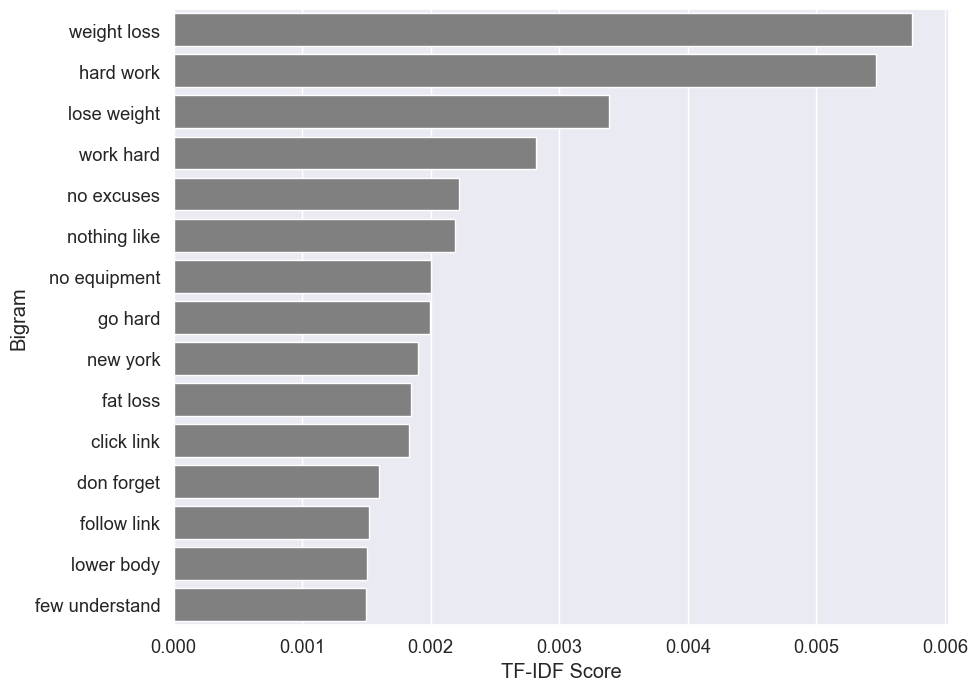

In [58]:
# all periods negative
analyze.bigram_tfidf(df_processed[df_processed['sentiment_label']=='negative']['processed_tweet'], 15, 'all_neg')

/Users/jiayan/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


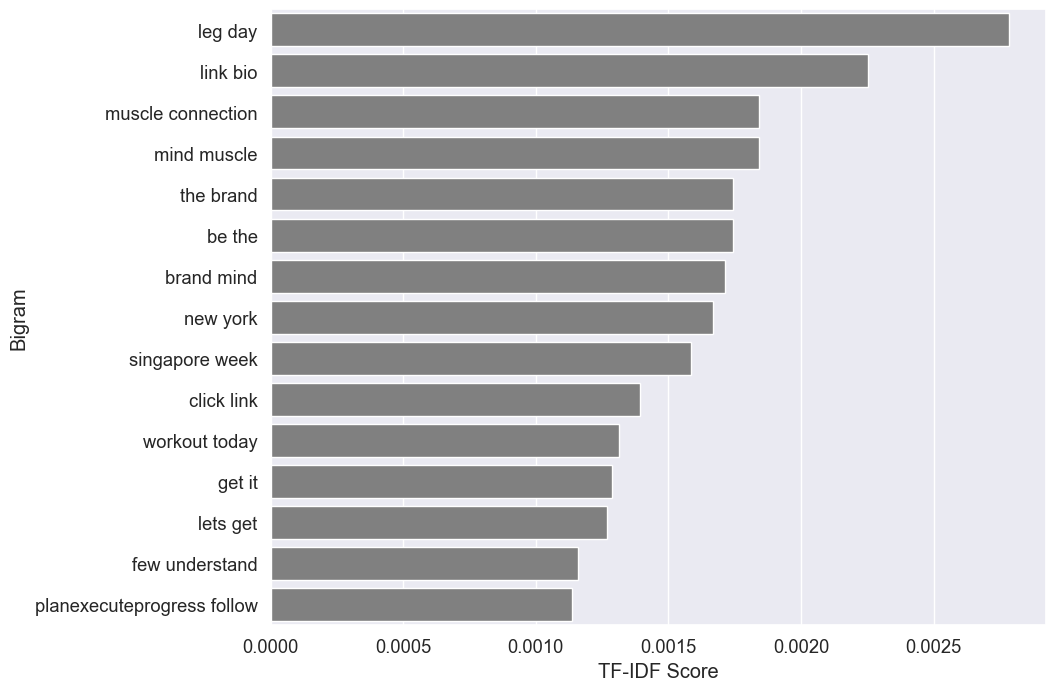

In [59]:
# all periods neutral
analyze.bigram_tfidf(df_processed[df_processed['sentiment_label']=='neutral']['processed_tweet'], 15, 'all_neu')

/Users/jiayan/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


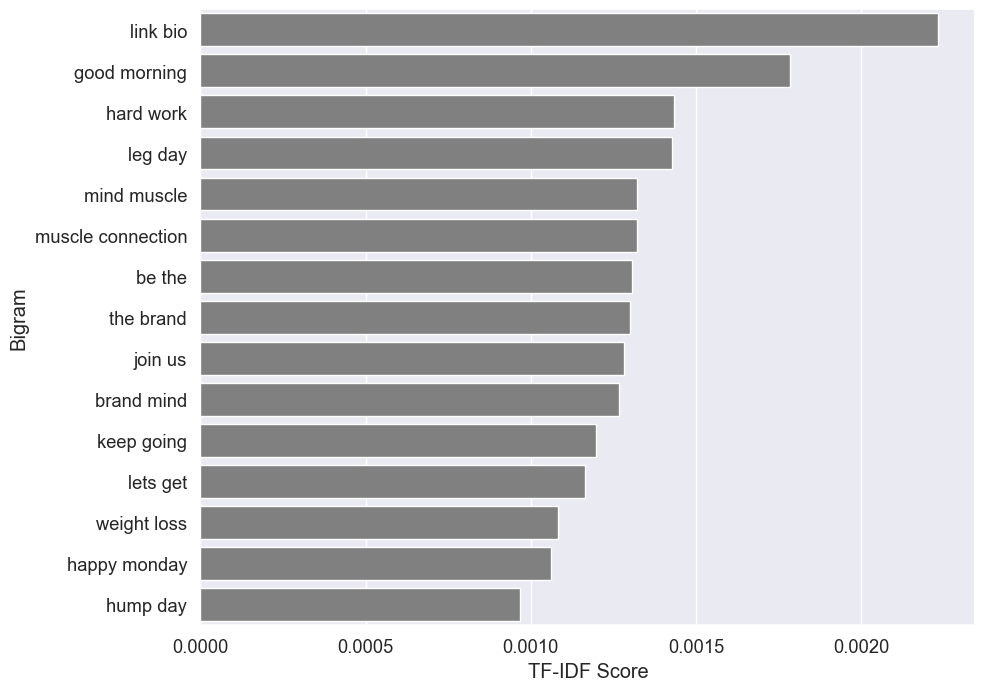

In [60]:
# pre-pandemic
analyze.bigram_tfidf(df_pre['processed_tweet'], 15, 'pre')

/Users/jiayan/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


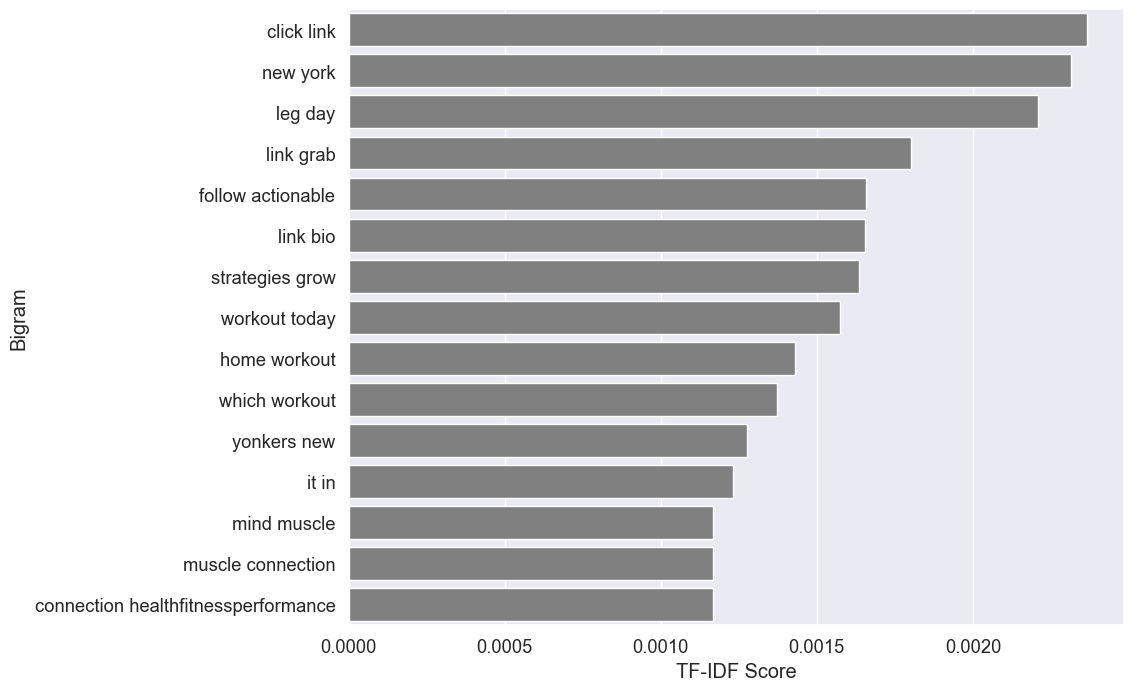

In [61]:
# early-pandemic
analyze.bigram_tfidf(df_early['processed_tweet'], 15, 'early')

/Users/jiayan/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


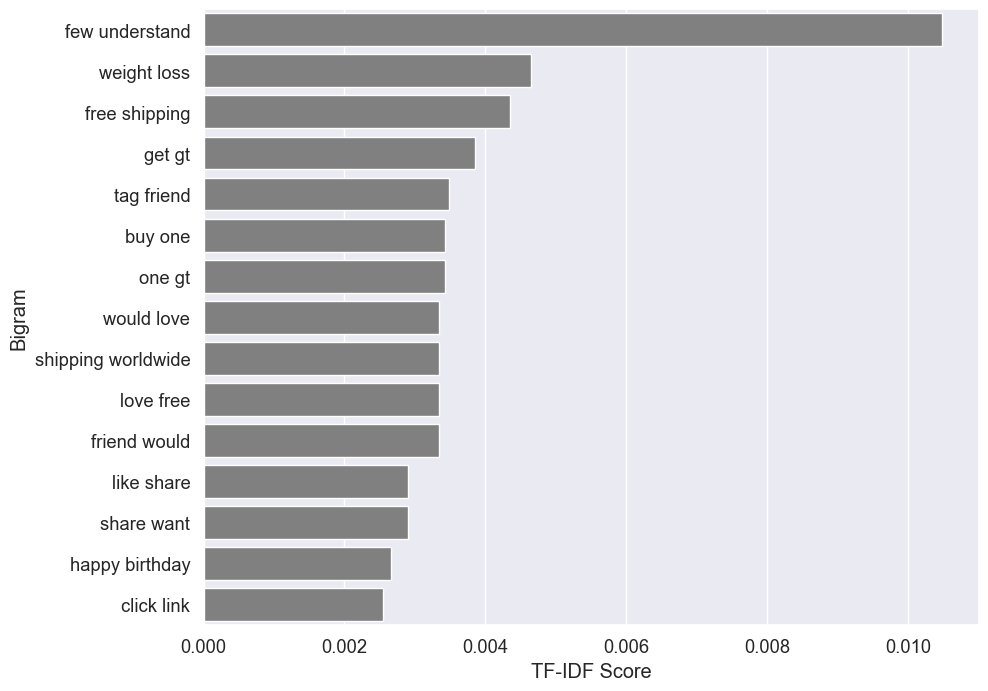

In [62]:
# late-pandemic
analyze.bigram_tfidf(df_late['processed_tweet'], 15, 'late')

## Author-pooled LDA

After testing, the Topic group 3 seed topic list yield the best results. The topics are:
1. body idealization and objectification;
2. weight loss and restrictive eating;
3. gender roles and sexualization;
4. fitness information and daily sharing;
5. motivation and inspiration;
6. advertisement for products or account.

['a', 'u', 'survey', 'show', 'half', 'woman', 'avoid', 'gym', 'fear', 'judge', 'weight', 'look', 'exercise', 'don', 'become', 'part', 'statistic', 'empower', 'tip', 'woman', 'month']
['just', 'kick']
['come', 'join', 'team']
['my', 'leisure', 'jog', 'back', 'take', 'toll', 'although', 'walking', 'way', 'affect', 'pace', 'much', 'i', 'need', 'learn', 'jog', 'slower']
['try', 'fit', 'ep', 'reach', 'help', 'wrong', 'what', 'wrong', 'need', 'help', 'start', 'silent']
None
Username
PTrainingBiz       179
QuitmanStephens    174
JazzerciseTylrs    140
MtPleasantJazz     116
PrettyboiBlood     103
FableLaboratory    102
MMGHouston          99
KimberlyMJuday      97
OogaliStore         94
TeamFFLEX           93
Name: count, dtype: int64


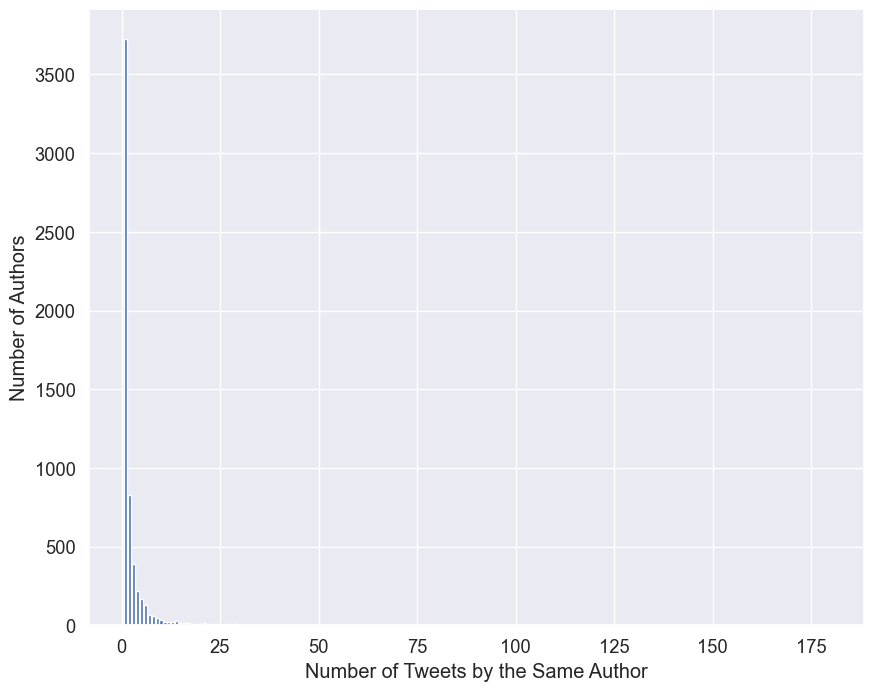

Coherence (UMass): -9.43598225510092
Coherence (c_v): 0.44769569789300395
Topics from all are:
(0, '0.007*"figurefitcoach" + 0.002*"round_roundnation" + 0.002*"round" + 0.001*"lt_gt" + 0.001*"gt_gt" + 0.001*"gym_gaul" + 0.001*"rounder" + 0.001*"roundnation" + 0.001*"trondheim" + 0.001*"punch" + 0.001*"lt_lt" + 0.001*"rag_top" + 0.001*"roundcville" + 0.001*"knowledge_bomb" + 0.001*"block_box" + 0.001*"brooklyn_new" + 0.000*"roundwinstonsalem" + 0.000*"build_solid" + 0.000*"discuss_goal" + 0.000*"simply_want"')
(1, '0.019*"i" + 0.016*"get" + 0.012*"day" + 0.009*"today" + 0.007*"workout" + 0.007*"work" + 0.007*"it" + 0.007*"go" + 0.007*"time" + 0.006*"the" + 0.006*"back" + 0.005*"you" + 0.005*"good" + 0.005*"make" + 0.005*"do" + 0.005*"new" + 0.005*"week" + 0.005*"one" + 0.005*"love" + 0.005*"amp"')
(2, '0.010*"amp" + 0.009*"workout" + 0.006*"the" + 0.006*"exercise" + 0.005*"get" + 0.004*"body" + 0.004*"u" + 0.004*"health" + 0.004*"check" + 0.004*"new" + 0.004*"help" + 0.003*"be" + 0.003*

In [306]:
# all samples, regardless of periods
all_ldamodel_3, all_bow_corpus = analyze.lda_pipeline(df_processed, 'all', analyze.topics_3)

Topic 0: advertisement for products or account.
Topic 1: fitness information and daily sharing.
Topic 2: fitness information and daily sharing.
Topic 3: fitness information and daily sharing.
Topic 4: advertisement for products or account.
Topic 5: fitness information and daily sharing.

### Pre-pandemic

['up', 'your', 'salad', 'game']
['what', 'think', 'documentary', 'the', 'game', 'changer', 'do', 'vegan', 'diet']
['you', 'awesome', 'keep', 'go', 'like']
['try', 'find', 'balance', 'step', 'outside', 'comfort', 'zone', 'whens', 'last', 'time', 'step', 'outside', 'thanks', 'cafenamaste', 'mia']
['let', 's', 'go']
None
Username
QuitmanStephens    120
JazzerciseTylrs    114
PTrainingBiz       102
KimberlyMJuday      97
FitsAppOfficial     64
kyleecho_cho        62
charliefit28        62
4by4circuits        59
tino3210            57
MMGHouston          54
Name: count, dtype: int64


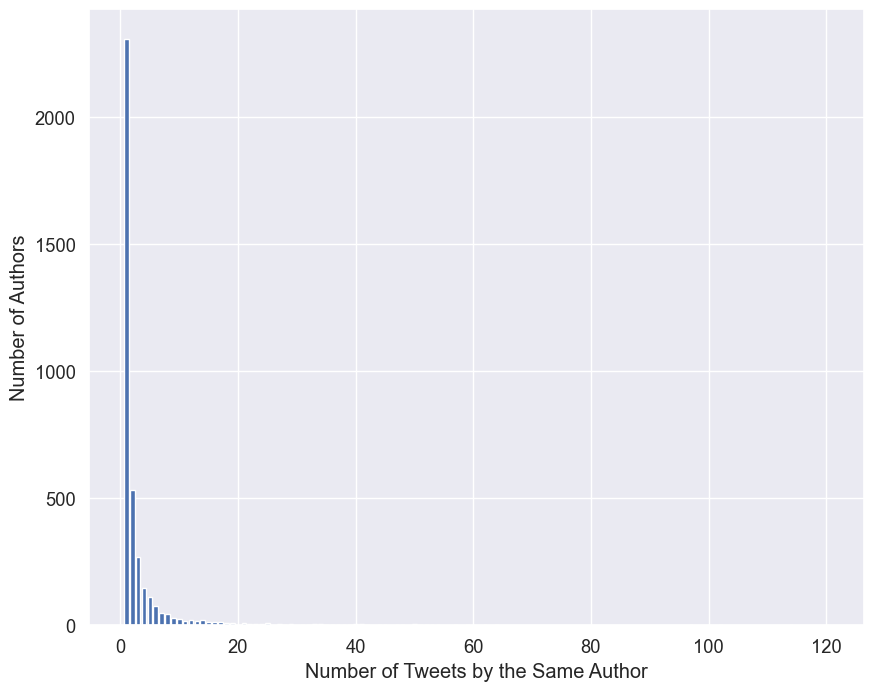

Coherence (UMass): -13.540947643080107
Coherence (c_v): 0.46078837765087294
Topics from pre_pandemic are:
(0, '0.015*"i" + 0.014*"get" + 0.011*"day" + 0.008*"workout" + 0.007*"amp" + 0.007*"today" + 0.006*"work" + 0.006*"the" + 0.006*"it" + 0.006*"time" + 0.006*"go" + 0.005*"new" + 0.005*"make" + 0.005*"good" + 0.005*"do" + 0.005*"be" + 0.004*"you" + 0.004*"back" + 0.004*"love" + 0.004*"week"')
(1, '0.005*"follow" + 0.004*"stphorm" + 0.003*"amp_p" + 0.002*"dancemixx" + 0.001*"ur" + 0.001*"p_dancemixx" + 0.001*"p_strength" + 0.001*"express" + 0.001*"krun_milerun" + 0.001*"enhance_power" + 0.001*"gym_gaul" + 0.001*"p_amp" + 0.001*"p_p" + 0.001*"taki" + 0.001*"squad" + 0.001*"k" + 0.001*"p_express" + 0.001*"train_safeand" + 0.001*"knowledge_bomb" + 0.001*"lt_lt"')
(2, '0.002*"be_the" + 0.002*"muscle_connection" + 0.002*"brand_mind" + 0.002*"mind_muscle" + 0.002*"mmcfit_be" + 0.002*"the_brand" + 0.002*"snap_fitness" + 0.002*"order_motivational" + 0.002*"it_in" + 0.001*"poster_link" + 0.001

In [303]:
pre_ldamodel_3, pre_bow_corpus = analyze.lda_pipeline(df_pre, 'pre_pandemic', analyze.topics_3)

After inspecting the top words and example tweets, I conclude that:
- Topic 0: Fitness information and daily sharing
- Topic 1: Fitness information and daily sharing
- Topic 2: Fitness information and daily sharing
- Topic 3: Fitness information and daily sharing
- Topic 4: Fitness information and daily sharing
- Topic 5: Body idealization and objectification

### Early-pandemic

['portable', 'folding', 'pill', 'box']
['once', 'control', 'mind', 'transformation', 'begin', 'be', 'gon', 'na', 'easy', 'heck', 'will', 'you', 'worth', 'absodernlutely']
['this', 'whole', 'core', 'fire']
['leave', 'mat', 'moment', 'train', 'potential', 'visigo', 'activewear', 'support']
['be']
None
Username
PTrainingBiz       77
cherie_pryor       68
FableLaboratory    60
TeamFFLEX          57
QuitmanStephens    54
prplehaiz          53
PrettyboiBlood     51
GeneFitness        51
yoojmaac           44
ChrisMason316      42
Name: count, dtype: int64


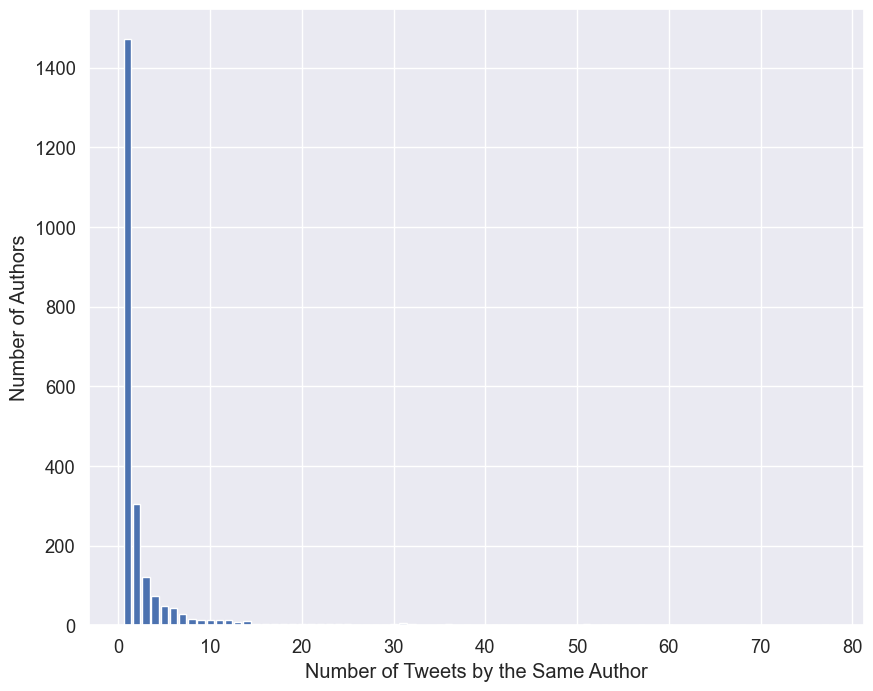

Coherence (UMass): -7.723537064299006
Coherence (c_v): 0.42035753497821493
Topics from early_pandemic are:
(0, '0.006*"woman" + 0.004*"promo" + 0.004*"open_house" + 0.003*"set" + 0.003*"machine" + 0.003*"exercise" + 0.002*"mr" + 0.002*"men" + 0.002*"protein" + 0.002*"whey" + 0.002*"multi" + 0.002*"sport" + 0.002*"powder" + 0.002*"keep_go" + 0.002*"via" + 0.002*"plate" + 0.002*"pc" + 0.002*"adjustable" + 0.002*"chocolate" + 0.002*"wrist"')
(1, '0.004*"get" + 0.004*"zoom" + 0.003*"new" + 0.003*"we" + 0.003*"merritt" + 0.003*"today" + 0.002*"check" + 0.002*"day" + 0.002*"athletic_club" + 0.002*"first" + 0.002*"week" + 0.002*"downtown" + 0.002*"andfit" + 0.002*"protein" + 0.002*"sesh" + 0.002*"pm" + 0.002*"box" + 0.002*"use" + 0.002*"member" + 0.002*"a"')
(2, '0.004*"im" + 0.003*"follow_actionable" + 0.003*"choose" + 0.003*"stphorm" + 0.002*"click_link" + 0.002*"post" + 0.002*"u" + 0.002*"beauty" + 0.002*"squat" + 0.002*"strategy_grow" + 0.002*"like" + 0.002*"amp_strategy" + 0.002*"hero" +

In [304]:
early_ldamodel_3, early_bow_corpus = analyze.lda_pipeline(df_early, 'early_pandemic', analyze.topics_3)

After inspecting the top words and example tweets, I conclude that:
- 0: Fitness information and daily sharing
- 1: Fitness information and daily sharing
- 2: Advertisement for products or account
- 3: Motivation and inspiration
- 4: Body idealization and objectification
- 5: Fitness information and daily sharing


### Late-pandemic topical analysis

['the', 'great', 'discovery', 'exipure', 'formula', 'bring', 'new', 'scenario', 'wish', 'lose', 'weight', 'naturally', 'website']
['tip', 'to', 'lose', 'weight', 'fast', 'the', 'ultimate', 'secret', 'to', 'lose', 'weight', 'fast', 'click', 'link']
['adventure', 'time', 'apparel', 'use', 'code', 'te', 'save']
['ugly', 'ass', 'outfit', 'come', 'ig', 'hashtag']
['shirtless']
None
Username
PNWStudios         92
MyLifeinZen1       62
kiwirip            40
TeamFFLEX          33
MtPleasantJazz     28
athletified        27
tho_mely           23
SicilianFitness    22
TeamSupacore       22
OogaliStore        22
Name: count, dtype: int64


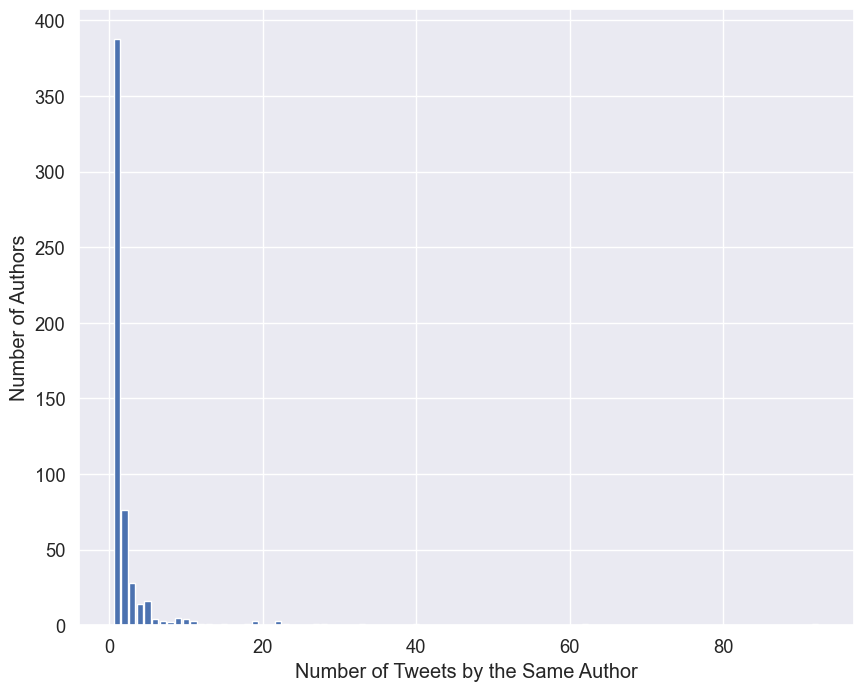

Coherence (UMass): -6.292377365890158
Coherence (c_v): 0.37517813602611483
Topics from late_pandemic are:
(0, '0.006*"get" + 0.006*"the" + 0.005*"i" + 0.005*"it" + 0.005*"free_shipping" + 0.004*"go" + 0.004*"you" + 0.004*"new" + 0.004*"tag_friend" + 0.004*"would_love" + 0.003*"day" + 0.003*"exercise" + 0.003*"push" + 0.003*"let" + 0.003*"gym" + 0.003*"back" + 0.002*"online" + 0.002*"week" + 0.002*"today" + 0.002*"one"')
(1, '0.011*"few_understand" + 0.007*"get" + 0.005*"want" + 0.004*"sec" + 0.003*"body" + 0.003*"i" + 0.003*"work" + 0.003*"go" + 0.003*"secs" + 0.003*"set" + 0.003*"move" + 0.003*"do_round" + 0.003*"hair" + 0.003*"need" + 0.002*"delivery_across" + 0.002*"like_share" + 0.002*"united_state" + 0.002*"one" + 0.002*"get_gt" + 0.002*"fast_u"')
(2, '0.004*"i" + 0.003*"the" + 0.003*"a" + 0.003*"click_link" + 0.003*"health" + 0.003*"for" + 0.003*"weight_loss" + 0.002*"day" + 0.002*"woman" + 0.002*"be" + 0.002*"get" + 0.002*"want" + 0.002*"make" + 0.002*"what" + 0.002*"sport" + 0.

In [305]:
late_ldamodel_3, late_bow_corpus = analyze.lda_pipeline(df_late, 'late_pandemic', analyze.topics_3)

After inspecting the top words and example tweets, I conclude that:
- Topic 0: advertisement for products or account.
- Topic 1: fitness information and daily sharing.
- Topic 2: weight loss and restrictive eating.
- Topic 3: fitness information and daily sharing.
- Topic 4: fitness information and daily sharing.
- Topic 5: motivation and inspiration.